## Building a predictive model for customer churn 
# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings

<module 'warnings' from 'C:\\Users\\Shubhangi\\anaconda3\\lib\\warnings.py'>

In [4]:
bank = pd.read_csv('churn_model.csv')
bank

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [5]:
bank.shape

(4521, 26)

In [6]:
bank.columns.values

array(['Unnamed: 0', 'age', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'unemployed',
       'services', 'management', 'blue-collar', 'self-employed',
       'technician', 'entrepreneur', 'admin.', 'student', 'housemaid',
       'retired', 'secondary', 'tertiary', 'married', 'single'],
      dtype=object)

In [7]:
bank.describe()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,0.016810,1422.657819,0.566025,0.152842,263.961292,2.793630,39.766645,0.542579,...,0.051316,0.040920,0.092900,0.018580,0.171201,0.028755,0.531962,0.311436,0.618668,0.264543
std,1305.244613,10.576211,0.128575,3009.638142,0.495676,0.359875,259.856633,3.109807,100.121124,1.693562,...,0.220666,0.198127,0.290324,0.135051,0.376726,0.167135,0.499033,0.463132,0.485767,0.441138
min,0.000000,19.000000,0.000000,-3313.000000,0.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1130.000000,33.000000,0.000000,69.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2260.000000,39.000000,0.000000,444.000000,1.000000,0.000000,185.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3390.000000,49.000000,0.000000,1480.000000,1.000000,0.000000,329.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,4520.000000,87.000000,1.000000,71188.000000,1.000000,1.000000,3025.000000,50.000000,871.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4521 non-null   int64  
 1   age            4521 non-null   float64
 2   default        4521 non-null   int64  
 3   balance        4521 non-null   float64
 4   housing        4521 non-null   int64  
 5   loan           4521 non-null   int64  
 6   duration       4521 non-null   float64
 7   campaign       4521 non-null   float64
 8   pdays          4521 non-null   float64
 9   previous       4521 non-null   float64
 10  y              4521 non-null   int64  
 11  unemployed     4521 non-null   float64
 12  services       4521 non-null   float64
 13  management     4521 non-null   float64
 14  blue-collar    4521 non-null   float64
 15  self-employed  4521 non-null   float64
 16  technician     4521 non-null   float64
 17  entrepreneur   4521 non-null   float64
 18  admin.  

We have 8 features of int value attributes and 18 of object data types

In [9]:
bank.duplicated().sum()

0

No duplicate values in given dataset

In [10]:
bank.isnull().sum()

Unnamed: 0       0
age              0
default          0
balance          0
housing          0
loan             0
duration         0
campaign         0
pdays            0
previous         0
y                0
unemployed       0
services         0
management       0
blue-collar      0
self-employed    0
technician       0
entrepreneur     0
admin.           0
student          0
housemaid        0
retired          0
secondary        0
tertiary         0
married          0
single           0
dtype: int64

No Null values in given dataset

In [11]:
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

0 is no values which is 4000 and 1 is yes values which is 521

In [12]:
100*bank['y'].value_counts()/len(bank['y'])

0    88.476001
1    11.523999
Name: y, dtype: float64

the term deposit data shows high variation 88.47% are no and 11.53% are yes. Data is highly imbalanced, ratio = 88:11. So we'll analyse the data with other features while taking the target values separately to get some insights.

We'll copy the data in another dataframe to avoid data loss of orignal data.

In [13]:
churn = bank.copy()

In [14]:
churn.head()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


## Data Cleaning

We can drop "Unnamed: 0"

In [16]:
churn.drop(["Unnamed: 0"],axis =1, inplace = True)

In [17]:
churn

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


There are many unknown entries we need to replace them as null/Nan

In [18]:
for i in churn.columns:
    churn[i] = np.where(churn[i] == "unknown", np.nan, churn[i])
churn.isna().sum()

age              0
default          0
balance          0
housing          0
loan             0
duration         0
campaign         0
pdays            0
previous         0
y                0
unemployed       0
services         0
management       0
blue-collar      0
self-employed    0
technician       0
entrepreneur     0
admin.           0
student          0
housemaid        0
retired          0
secondary        0
tertiary         0
married          0
single           0
dtype: int64

# Univariate analysis

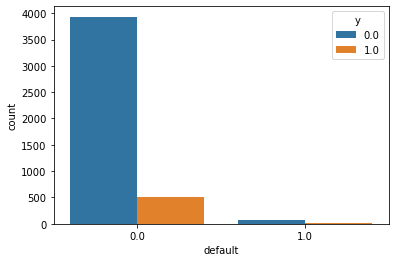

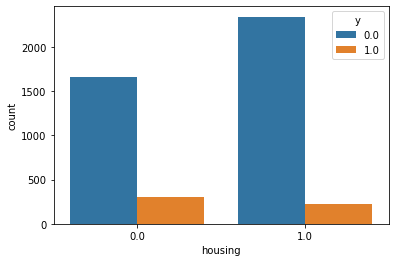

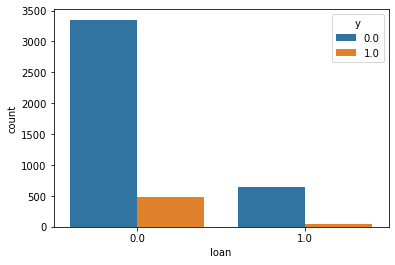

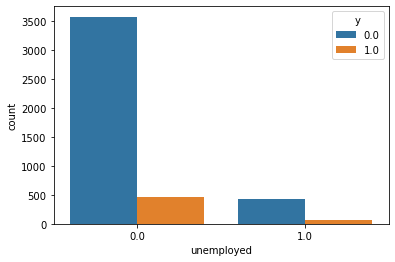

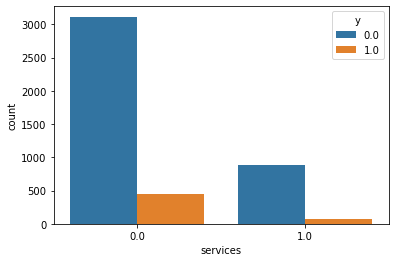

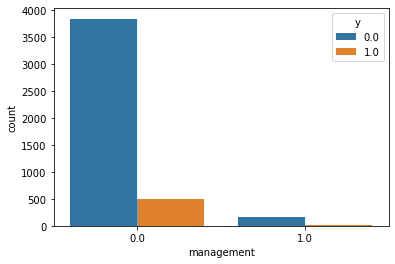

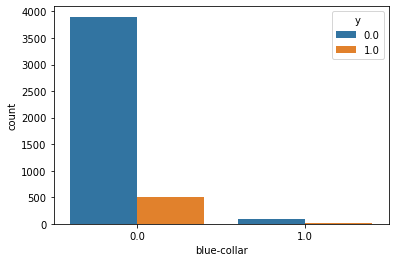

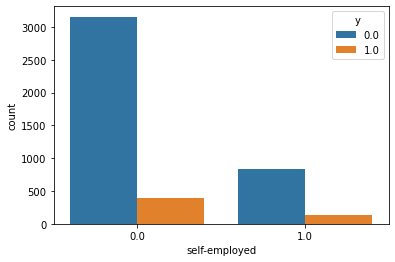

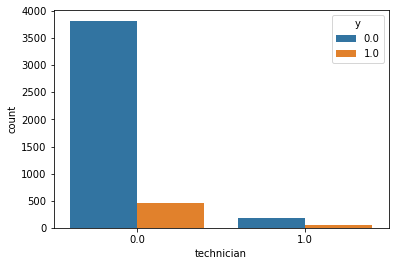

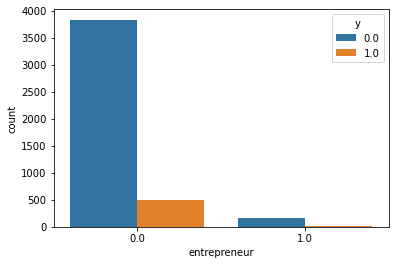

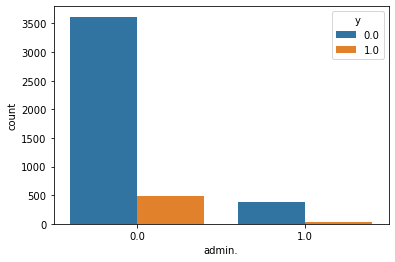

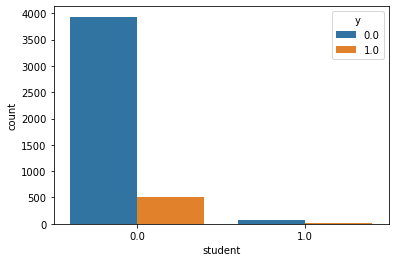

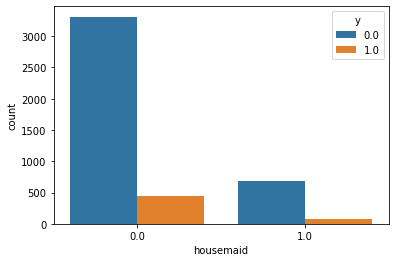

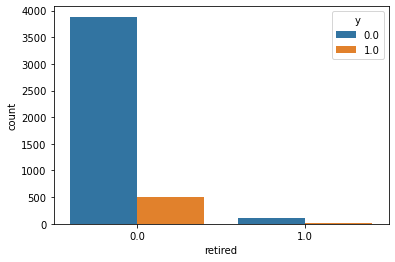

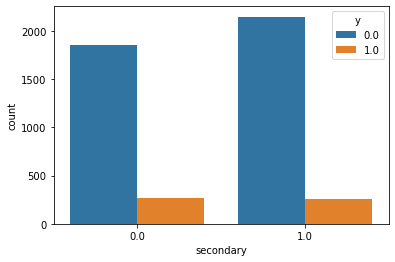

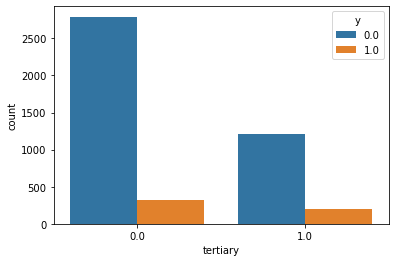

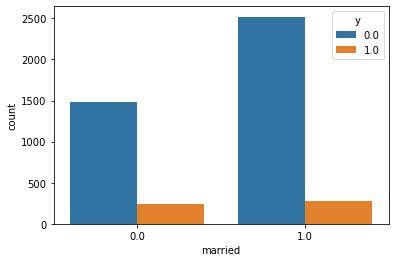

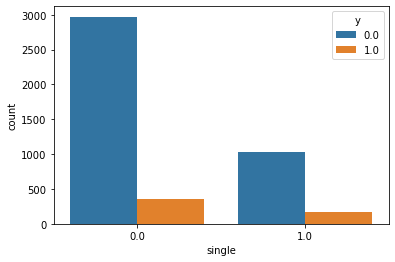

In [20]:
for i,predictor in enumerate(churn.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
    plt.figure(i)
    sns.countplot(data=churn, x=predictor, hue='y')

<AxesSubplot:>

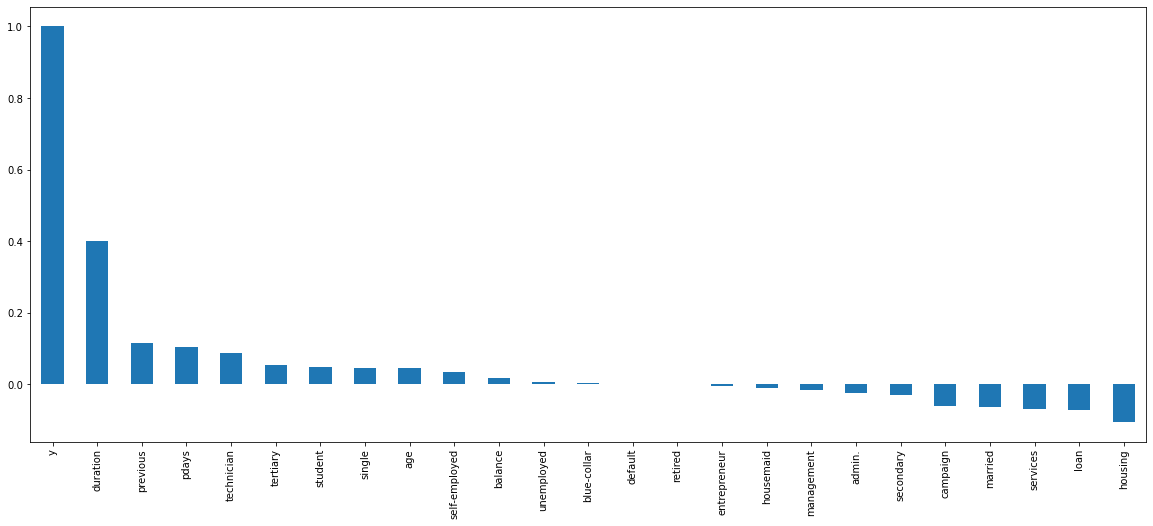

In [21]:
plt.figure(figsize=(20,8))
churn.corr()['y'].sort_values(ascending = False).plot(kind='bar')

Heatmap to gain insights about correlation

<AxesSubplot:>

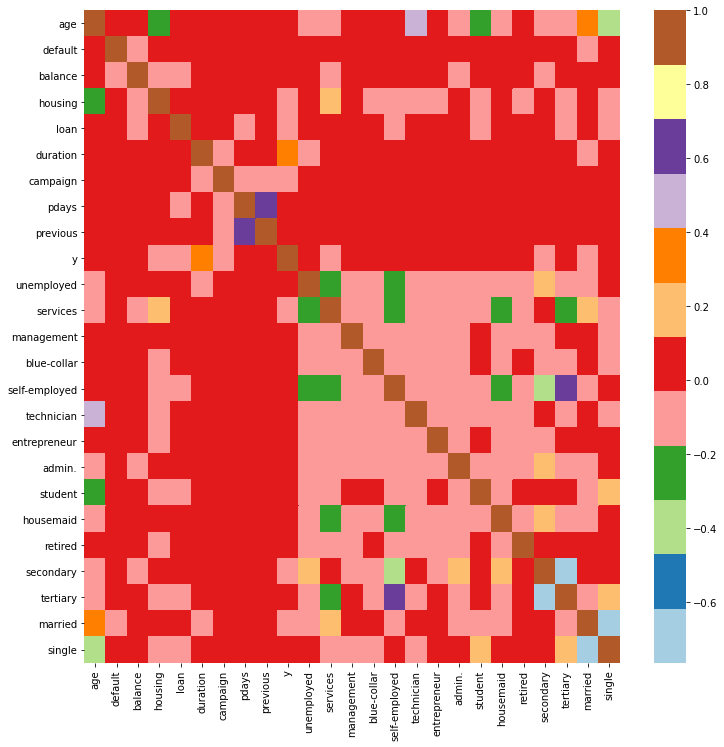

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(churn.corr(), cmap="Paired")

In [24]:
churn.to_csv('churn_model1.csv')

# Model Building

In [25]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [26]:
df=pd.read_csv("churn_model1.csv")
df.head()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0.0,1787.0,0.0,0.0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,33.0,0.0,4789.0,1.0,1.0,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,35.0,0.0,1350.0,1.0,0.0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,30.0,0.0,1476.0,1.0,1.0,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,59.0,0.0,0.0,1.0,0.0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
df=df.drop('Unnamed: 0',axis=1)

In [28]:
x=df.drop('y',axis=1)
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0.0,1787.0,0.0,0.0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,33.0,0.0,4789.0,1.0,1.0,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,35.0,0.0,1350.0,1.0,0.0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,30.0,0.0,1476.0,1.0,1.0,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,59.0,0.0,0.0,1.0,0.0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0.0,-333.0,1.0,0.0,329.0,5.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4517,57.0,1.0,-3313.0,1.0,1.0,153.0,1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4518,57.0,0.0,295.0,0.0,0.0,151.0,11.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4519,28.0,0.0,1137.0,0.0,0.0,129.0,4.0,211.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
y=df['y']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4516    0.0
4517    0.0
4518    0.0
4519    0.0
4520    0.0
Name: y, Length: 4521, dtype: float64

# # Decision Tree Classifier

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [32]:
y_pred=model_dt.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [33]:
model_dt.score(x_test,y_test)

0.8950276243093923

In [34]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       805
           1       0.54      0.35      0.42       100

    accuracy                           0.90       905
   macro avg       0.73      0.66      0.68       905
weighted avg       0.88      0.90      0.89       905



In [35]:
print(metrics.confusion_matrix(y_test, y_pred))

[[775  30]
 [ 65  35]]


89.50% accuracy

As the data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [36]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [37]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [38]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [39]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9336170212765957
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       555
         1.0       0.93      0.94      0.94       620

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



In [40]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[513  42]
 [ 36 584]]


This method gave 93.36% accuracy, I also tried by changing the criterion to 'entropy' but it achieved 91.38% accuracy only which is less than 'gini' index method

## Random Forest Classifier

In [41]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [42]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [43]:
y_pred=model_rf.predict(x_test)

In [44]:
model_rf.score(x_test,y_test)

0.8883977900552487

In [45]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       805
           1       0.00      0.00      0.00       100

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.79      0.89      0.84       905



In [46]:
print(metrics.confusion_matrix(y_test, y_pred))

[[804   1]
 [100   0]]


88.83% accuracy

Let us again use the SMOTEENN samples of x & y for Random Forest

In [47]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [48]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9523404255319149
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       530
         1.0       0.96      0.95      0.96       645

    accuracy                           0.95      1175
   macro avg       0.95      0.95      0.95      1175
weighted avg       0.95      0.95      0.95      1175



In [50]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[504  26]
 [ 30 615]]


This method gave 93.80% accuracy, I also tried by changing the criterion to 'entropy' it achieved 95.23% accuracy even higher than 'gini' index method

# XGBoost Classifier

In [51]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [52]:
model_xg_smote=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote.fit(xr_train2,yr_train2)

C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
yr_predict2 = model_xg_smote.predict(xr_test2)

In [54]:
model_score_r2 = model_xg_smote.score(xr_test2, yr_test2)

In [55]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))
print(metrics.confusion_matrix(yr_test2, yr_predict2))

0.9744680851063829
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       544
         1.0       0.98      0.98      0.98       631

    accuracy                           0.97      1175
   macro avg       0.97      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175

[[529  15]
 [ 15 616]]


XGBoost achieved accuracy of 96.81% when test_size=0.20 , when I tried with test_size=0.3 it dropped to 97.44%`

# Logistic Regression

In [56]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [57]:
model_lr_smote=LogisticRegression( random_state = 100)
model_lr_smote.fit(xr_train3,yr_train3)

C:\Users\Shubhangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [58]:
LogisticRegression(random_state=100)

LogisticRegression(random_state=100)

In [59]:
yr_predict3 = model_lr_smote.predict(xr_test3)

In [61]:
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)

In [62]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.8689361702127659
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       568
         1.0       0.86      0.89      0.87       607

    accuracy                           0.87      1175
   macro avg       0.87      0.87      0.87      1175
weighted avg       0.87      0.87      0.87      1175



In [63]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[483  85]
 [ 69 538]]


In [ ]:
Logistic Regression achieved accuracy of just 86.89%

# PCA

In [64]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train2)
xr_test_pca = pca.transform(xr_test2)
explained_variance = pca.explained_variance_ratio_

In [65]:
model_xg_smote_pca=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote_pca.fit(xr_train_pca,yr_train2)

[12:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
yr_predict_pca = model_xg_smote_pca.predict(xr_test_pca)
model_score_r_pca = model_xg_smote_pca.score(xr_test_pca, yr_test2)
print(model_score_r_pca)
print(metrics.classification_report(yr_test2, yr_predict_pca))

0.6314893617021277
              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60       544
         1.0       0.65      0.67      0.66       631

    accuracy                           0.63      1175
   macro avg       0.63      0.63      0.63      1175
weighted avg       0.63      0.63      0.63      1175



In [67]:
print(metrics.confusion_matrix(yr_test1, yr_predict_pca))

[[256 274]
 [271 374]]


With PCA, we couldn't see any better results, hence let's finalise the model which was created by XGBoost Classifier (97.44% accuracy), and fine tune it using various techniques

# Cross Validation

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [69]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [70]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 97.19% (0.83%)


We achieved 97.19% accuracy after performing cross validation which is great , now lets try Random search on our model/XGBoost to find its best parameters

# Random Search to find best parameters

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [73]:
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}

In [74]:
rs = RandomizedSearchCV(model_xg_smote, params, cv=5, random_state=42, n_jobs=-1)

In [75]:
rs.fit(xr_train2,yr_train2)

C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CF16C78BB0>,
        

In [76]:
y_pred = rs.predict(xr_test2)

In [77]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yr_test2, y_pred)

In [78]:
print("Best hyperparameters: ", rs.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.3406585285177396, 'gamma': 0.4330880728874676, 'learning_rate': 0.19033450352296263, 'max_depth': 9, 'n_estimators': 180, 'reg_lambda': 0.041168988591604894, 'subsample': 0.978936896513396}
Accuracy:  0.9787234042553191


# Final Model

Lets fine tune our model with these parameters and produce our final model

In [79]:
model_xg_smote=XGBClassifier(colsample_bytree= 0.3406585285177396, gamma= 0.4330880728874676, learning_rate= 0.19033450352296263, max_depth= 9, n_estimators=180, reg_lambda= 0.041168988591604894, subsample=0.978936896513396)
model_xg_smote.fit(xr_train2,yr_train2)

C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3406585285177396,
              enable_categorical=False, gamma=0.4330880728874676, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.19033450352296263, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=0.041168988591604894,
              scale_pos_weight=1, subsample=0.978936896513396,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
yr_predict4 = model_xg_smote.predict(xr_test2)

In [81]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)


In [82]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.977872340425532
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       544
         1.0       0.98      0.98      0.98       631

    accuracy                           0.98      1175
   macro avg       0.98      0.98      0.98      1175
weighted avg       0.98      0.98      0.98      1175

[[531  13]
 [ 13 618]]


In [83]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [84]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shubhangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 97.08% (0.89%)


In [86]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [87]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.977872340425532
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       544
         1.0       0.98      0.98      0.98       631

    accuracy                           0.98      1175
   macro avg       0.98      0.98      0.98      1175
weighted avg       0.98      0.98      0.98      1175

[[531  13]
 [ 13 618]]


In [88]:
accuracy = accuracy_score(yr_test2, yr_predict4)

In [89]:
print("Accuracy: ", accuracy)

Accuracy:  0.977872340425532


We have achieved accuracy of 97.78% after cross validation and fine tuning our model with the best parameters

# AUC-ROC

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve

In [91]:
y_pred_prob = model_xg_smote.predict_proba(xr_test2)[:,1]

In [92]:
auc_roc = roc_auc_score(yr_test2, y_pred_prob)
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.997736436095833


In [ ]:
AUC-ROC score is 0.997736 which is almost 1 which indicates our model is almost perfect

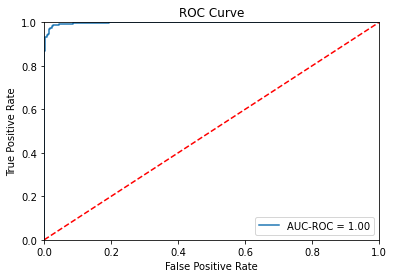

In [93]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_pred_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Now let's save our model

# Saving Model

In [94]:
import pickle
filename = 'final_Model.sav'
pickle.dump(model_xg_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r4 = load_model.score(xr_test2, yr_test2)
model_score_r4

0.977872340425532